# 新闻文本聚类
本研究利用新闻文本数据，进行新闻文本聚类。数据字段和具体含义如下：
- news_id: 新闻唯一标识
- title: 新闻标题
- content: 新闻内容
# 1.数据预处理

In [1]:
import jieba
import pandas as pd

In [2]:
# 加载停用词
with open('D:/大四上/数据挖掘与商业分析/作业2/chinese_stopwords.txt', 'r', encoding='utf-8') as f:
    stop_words = set([line.strip() for line in f])
    
# 文本预处理
def preprocess(text):
    words = jieba.lcut(text)
    words = [word for word in words if word not in stop_words and len(word) > 1]
    return ' '.join(words)

In [3]:
# 读取CSV文件
news_data = pd.read_csv('D:/大四上/数据挖掘与商业分析/作业2/news_data.csv')
# 查看数据
news_data.head()

,news_id,title,content
0,1,【硅谷周报】课堂互动工具 Kahoot 融资1700万美元，估值达 1 亿美元,“硅谷周报”是芥末堆推出的一个全新的栏目，由芥末堆驻硅谷的小伙伴荔闽（她的邮箱是 limin...
1,2,积云教育获正保远程教育数千万A轮融资，发力IT职业教育,芥末堆3月30日讯，积云教育宣布完成数千万A轮融资，投资方为美国上市公司正保远程教育。据了解...
2,3,【投资笔记】2018年3月教育投资31亿元，再创历史新高,图片来源：pixabay【投资笔记】是芥末堆的堆栈资本团队带来的专栏，每月初我们会为您回顾上...
3,4,"23家企业，40多亿,腾讯加码教育投资",图片来源：摄图网3月20日腾讯连投法国游戏公司育碧、英语启蒙教育宝宝玩英语。这标志着腾讯在继...
4,5,英语小神童获 Pre A 轮投资，投资方为蓝湖资本,芥末堆4月19日讯，今日，英语启蒙品牌“英语小神童”宣布获得Pre A轮融资，本轮投资方为蓝...


In [13]:
news_data.tail()

,news_id,title,content
1536,1537,博彩巨头杀入网球大满贯赛场，威廉希尔在幕后如何运营,澳网 还有 两个 开打 之前 有些 不同 本届 迎来 大满贯 历史 第一个 博彩 赞助商 廉...
1537,1538,美国足球职业化也20年，人家俱乐部市值总和已过10亿美元大关,美国 足球 职业化 第个 年头 福布斯 年终 统计 美国 足球 职业 联盟 俱乐部 平均 市...
1538,1539,国足输了，但“赢”了的耐克为何如此低调？,上演 奇迹 淘汰 澳大利亚 不论 还是 擅长 营销 赞助商 耐克 此次 亚洲杯 低调 表现 ...
1539,1540,王健林“加冕礼”，马竞之后或再买英超球队,王健林 不苟言笑 聚光灯 当年 经营 大连 万达 不同 一次 王健林 欧元 购入 西甲 卫冕...
1540,1541,中国富豪买下荷甲俱乐部,这个 交易 去年 月份 开始 关注 过去 半年 时间 终于 新进展 今天 先发个 短消息 稍...


In [5]:
import re
# 删除文本中的数字和英文
news_data['content'] = news_data['content'].apply(lambda x: re.sub(r'[a-zA-Z0-9]', '', x))
# 对每条评论进行预处理
news_data['content'] = news_data['content'].apply(preprocess)
news_data.head()

,news_id,title,content
0,1,【硅谷周报】课堂互动工具 Kahoot 融资1700万美元，估值达 1 亿美元,硅谷 周报 芥末 推出 一个 全新 栏目 芥末 硅谷 小伙伴 荔闽 邮箱 带来 投递 过去 ...
1,2,积云教育获正保远程教育数千万A轮融资，发力IT职业教育,芥末 积云 教育 宣布 完成 数千万 融资 投资方 美国 上市公司 正保 远程教育 了解 积...
2,3,【投资笔记】2018年3月教育投资31亿元，再创历史新高,图片 来源 投资 笔记 芥末 堆栈 资本 团队 带来 专栏 每月 我们 会为 回顾 上个月 ...
3,4,"23家企业，40多亿,腾讯加码教育投资",图片 来源 摄图 腾讯 连投 法国 游戏 公司 育碧 英语 启蒙教育 宝宝 英语 标志 腾讯...
4,5,英语小神童获 Pre A 轮投资，投资方为蓝湖资本,芥末 今日 英语 启蒙 品牌 英语 神童 宣布 获得 融资 本轮 投资方 蓝湖 资本 融资额...


In [8]:
from collections import Counter
# 统计词频
word_counts = Counter(' '.join(news_data['content']).split())
# 按词频从大到小排序
sorted_word_counts = word_counts.most_common()
# 输出词频
for word, count in sorted_word_counts:
    print(f'{word}: {count}')

公司: 4640
足球: 3838
投资: 3297
融资: 2818
教育: 2783
我们: 2768
中国: 2733
医疗: 2592
俱乐部: 2523
体育: 2362
服务: 2229
一个: 2208
平台: 2151
提供: 2108
产品: 2009
市场: 1939
目前: 1938
他们: 1913
通过: 1836
技术: 1791
可以: 1677
领域: 1644
获得: 1574
进行: 1573
合作: 1526
发展: 1512
表示: 1506
用户: 1497
机构: 1394
已经: 1389
美国: 1373
以及: 1372
资本: 1360
球队: 1315
球员: 1312
企业: 1272
主要: 1270
比赛: 1265
健康: 1246
完成: 1243
收入: 1243
数据: 1239
联赛: 1232
管理: 1198
包括: 1190
团队: 1183
成立: 1171
赛季: 1154
行业: 1152
学习: 1142
未来: 1137
患者: 1116
成为: 1114
万美元: 1077
欧元: 1077
培训: 1018
方面: 998
超过: 988
这个: 975
项目: 961
学生: 958
业务: 940
医生: 937
同时: 927
一家: 911
内容: 888
自己: 887
球迷: 864
帮助: 860
没有: 854
集团: 851
互联网: 840
课程: 832
宣布: 822
拥有: 819
开始: 809
开发: 805
英超: 800
创始人: 796
国内: 794
基金: 792
科技: 791
能够: 785
需要: 777
作为: 773
全球: 752
来自: 747
研发: 738
对于: 735
世界杯: 732
这些: 724
系统: 723
时间: 707
治疗: 706
品牌: 705
在线: 703
媒体: 700
可能: 686
资金: 680
运营: 678
实现: 674
其他: 663
方式: 660
问题: 659
关于: 657
希望: 652
计划: 648
医院: 645
今年: 642
亿美元: 640
国际: 636
懒熊: 632
商业: 628
模式: 624
其中: 623
职业: 622
国家: 615
就是

# 2.向量空间模型

采用TF-IDF权重，利用向量空间模型对新闻文本进行向量化

In [9]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(news_data['content'])

# 将向量化的结果转换为数据框，方便查看
tfidf_result = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_result.head()

,__,一一,一丁点,一万,一万个,一万二千,一万名,一万多名,一下,一下子,...,龙应台,龙文,龙灯,龙狮,龙珠,龙科技,龙腾,龙舟,龙虾,龙门
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3.K-means聚类分析

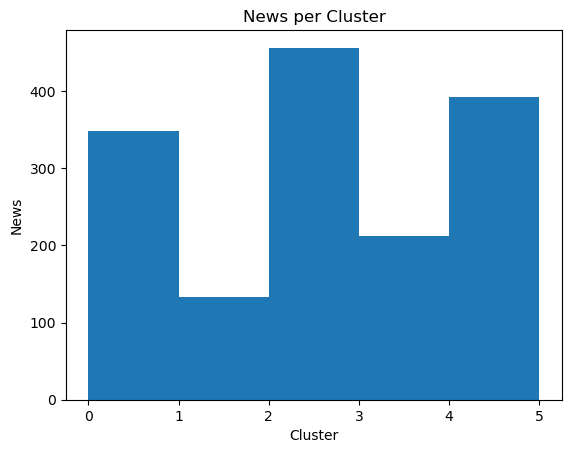

In [17]:
from sklearn.cluster import KMeans
# 使用KMeans进行聚类
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, random_state = 628)
labels = kmeans.fit_predict(X)

plt.hist(labels, bins = range(n_clusters + 1))
plt.title ('News per Cluster')
plt.xlabel('Cluster')
plt.ylabel('News')
plt.show()

## 确定最优K

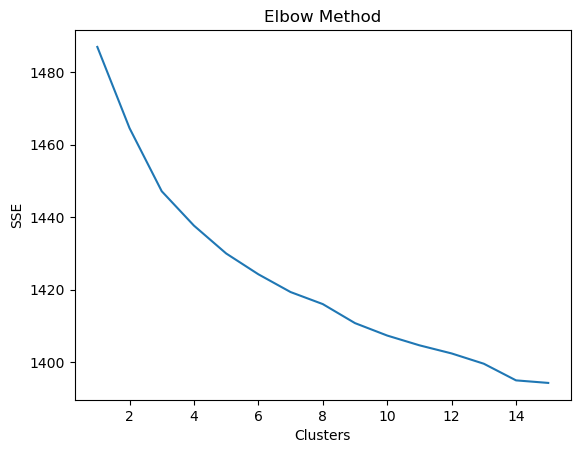

In [19]:
#肘部法
sse = []
cluster_list = range(1, 16)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, random_state = 628)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(cluster_list, sse)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

没有明显的转折处

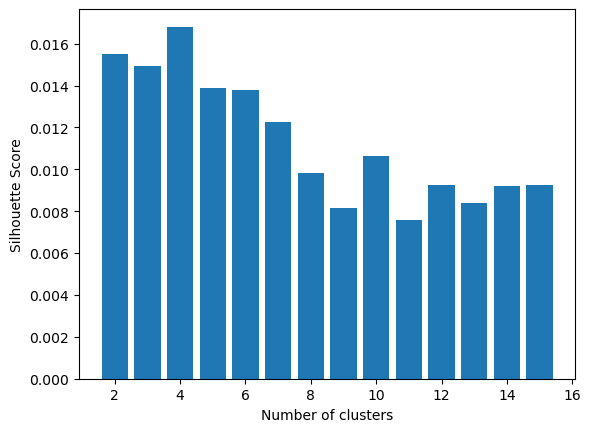

In [22]:
#轮廓系数
from sklearn.metrics import silhouette_score
s = [] 
cluster_list = range(2, 16)
for i in cluster_list:
    kmeans = KMeans(n_clusters = i, random_state = 628)
    s.append(silhouette_score(X, kmeans.fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
plt.bar(cluster_list, s) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

基于肘部法则和轮廓系数的结果，可以发现，K=4是最优的聚类系数。接下来应用K=4的聚类

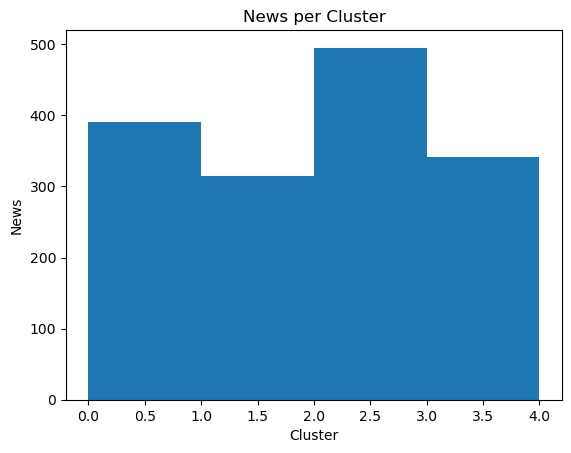

In [24]:
kmeans = KMeans(n_clusters = 4, random_state = 628) 
labels = kmeans.fit_predict(X)
news_data["cluster"] = labels
# plot cluster sizes
plt.hist(labels, bins = range(5))
plt.title ('News per Cluster')
plt.xlabel('Cluster')
plt.ylabel('News')
plt.show()

In [25]:
news_data.head()

,news_id,title,content,cluster
0,1,【硅谷周报】课堂互动工具 Kahoot 融资1700万美元，估值达 1 亿美元,硅谷 周报 芥末 推出 一个 全新 栏目 芥末 硅谷 小伙伴 荔闽 邮箱 带来 投递 过去 ...,2
1,2,积云教育获正保远程教育数千万A轮融资，发力IT职业教育,芥末 积云 教育 宣布 完成 数千万 融资 投资方 美国 上市公司 正保 远程教育 了解 积...,2
2,3,【投资笔记】2018年3月教育投资31亿元，再创历史新高,图片 来源 投资 笔记 芥末 堆栈 资本 团队 带来 专栏 每月 我们 会为 回顾 上个月 ...,2
3,4,"23家企业，40多亿,腾讯加码教育投资",图片 来源 摄图 腾讯 连投 法国 游戏 公司 育碧 英语 启蒙教育 宝宝 英语 标志 腾讯...,2
4,5,英语小神童获 Pre A 轮投资，投资方为蓝湖资本,芥末 今日 英语 启蒙 品牌 英语 神童 宣布 获得 融资 本轮 投资方 蓝湖 资本 融资额...,2


# 4.各组新闻特点

In [26]:
# 获取每个聚类中心的最大值
top_indices = kmeans.cluster_centers_.argsort()[:, ::-1]

# 获取特征名字
feature_names = vectorizer.get_feature_names_out()

# 打印每个聚类的前10个关键词
for i in range(kmeans.n_clusters):
    top_features = [feature_names[j] for j in top_indices[i, :10]]
    print(f"Cluster {i}:")
    print(", ".join(top_features))

Cluster 0:
足球, 俱乐部, 体育, 中国, 球队, 球员, 联赛, 比赛, 世界杯, 赛季
Cluster 1:
游戏, 虚拟现实, 体验, 公司, 技术, 市场, 内容, 我们, 设备, 现实
Cluster 2:
教育, 学习, 学生, 融资, 课程, 投资, 培训, 平台, 公司, 老师
Cluster 3:
医疗, 公司, 患者, 健康, 投资, 融资, 医生, 治疗, 技术, 关于


结合上述两个步骤不难发现，本数据集的新闻内容可大致分为四个类别：教育类、体育类、医疗类以及游戏类。其中，医疗类和教育类均包含“融资”、“投资”等代表词，推测其属于投融资类新闻下的子类别。